**Generative Adverserial Networks**


In [134]:
from keras.datasets import mnist
from keras.layers import *
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.optimizers import adam_v2

import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [135]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

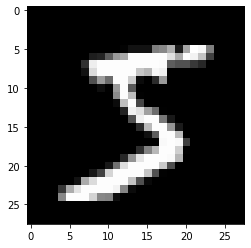

In [136]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [137]:
# Normalise the data from [-1,1]

In [138]:
X_Train = (X_train.astype('float32') - 127.5)/127.5
print(np.min(X_Train))
print(np.max(X_Train))
print(X_Train.shape)

-1.0
1.0
(60000, 28, 28)


In [139]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256 # amount of images in a single batch
NO_OF_BATCHES = int(X_Train.shape[0]/BATCH_SIZE) # 60000/256 => number of minies batch of data passing through the discriminator in one epoch
HALF_BATCH = int(BATCH_SIZE/2) # half of images will be fake and other half would be real
NOISE_DIM = 100 # upsample this noise to 784 dimensional vector which forms a 28 X 28 images
adam = adam_v2.Adam(learning_rate=2e-4,beta_1=0.5)

In [140]:
# Reshape the training data
X_Train = X_Train.reshape(-1,784)
print(X_Train.shape)

(60000, 784)


In [141]:
# Generator
# Inputs Noise (100 dim) Output vector of generated image (784 dimensional)
generator = Sequential()
generator.add(Dense(256,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024,input_shape=(NOISE_DIM,)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784,activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_64 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 1024)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 784)             

```
for generator we did upsampling by chnaging 100 dimensional to 784 dimensional vector but in discriminator we do downsampling 
```





In [142]:
discriminator = Sequential()
discriminator.add(Dense(512,input_shape=(784,)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_67 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_68 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_49 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [143]:
# output from discriminator is either 0 or 1 as we are using sigmoid for the ouput

In [144]:
# Steps to make a GAN
# step 1 : Freeze the generator and train the discriminator
# step 2 : Freeze the discriminator and train the generator

In [145]:
# GAN
discriminator.trainable = False
gan_input = Input(shape=(NOISE_DIM))
genarated_img = generator(gan_input)
gan_output = discriminator(genarated_img)

# Keras Functional API
model = Model(gan_input,gan_output)
model.compile(loss='binary_crossentropy',optimizer=adam)


In [146]:
# creating folder images
if not os.path.exists('images'): 
  os.makedirs('images')
  
def save_imgs(epoch,samples=100):
  noise = np.random.normal(0,1,size=(samples,NOISE_DIM))
  generated_imgs = generator.predict(noise)
  generated_imgs = generated_imgs.reshape(samples,28,28)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(10,10,i+1)
    plt.imshow(generated_imgs[i],interpolation='nearest',cmap='gray')
    plt.axis('off')
  
  plt.tight_layout()
  plt.savefig("images/gan_output_epoch_{0}.png".format(epoch+1))
  plt.show()

At Epoch 1 Discriminator loss is 0.6432928415572542 and Generator Loss is 0.9291302238264655
At Epoch 2 Discriminator loss is 0.648030137277057 and Generator Loss is 1.0168475821996346
At Epoch 3 Discriminator loss is 0.6367433572936262 and Generator Loss is 1.0827365377519884
At Epoch 4 Discriminator loss is 0.623515687055058 and Generator Loss is 1.13310685269853
At Epoch 5 Discriminator loss is 0.6022553299991493 and Generator Loss is 1.1820650492977893


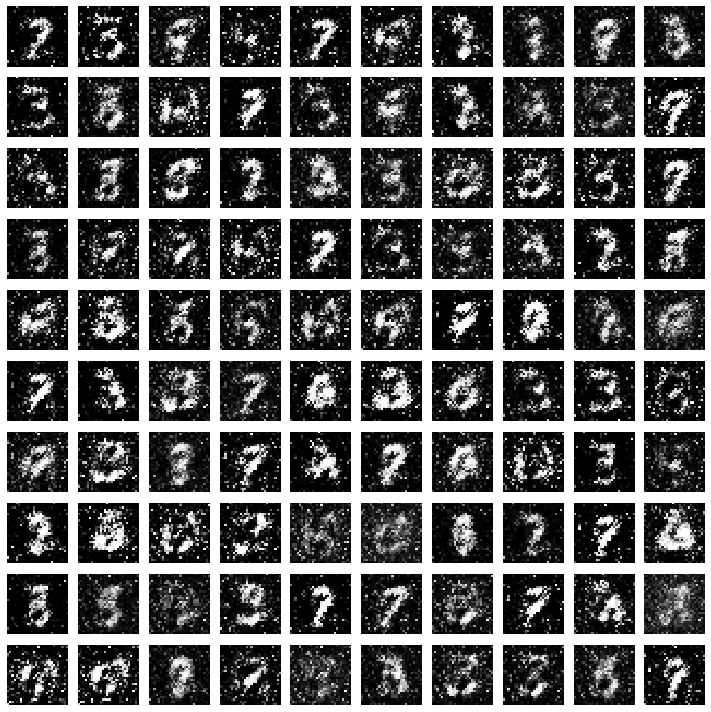

At Epoch 6 Discriminator loss is 0.5801714779092715 and Generator Loss is 1.2440889223009093
At Epoch 7 Discriminator loss is 0.5785901309588016 and Generator Loss is 1.271469805485163
At Epoch 8 Discriminator loss is 0.6057473690463946 and Generator Loss is 1.177853882822216
At Epoch 9 Discriminator loss is 0.6369694547775464 and Generator Loss is 1.0712191151757526
At Epoch 10 Discriminator loss is 0.6432538329281359 and Generator Loss is 1.0269015653011127


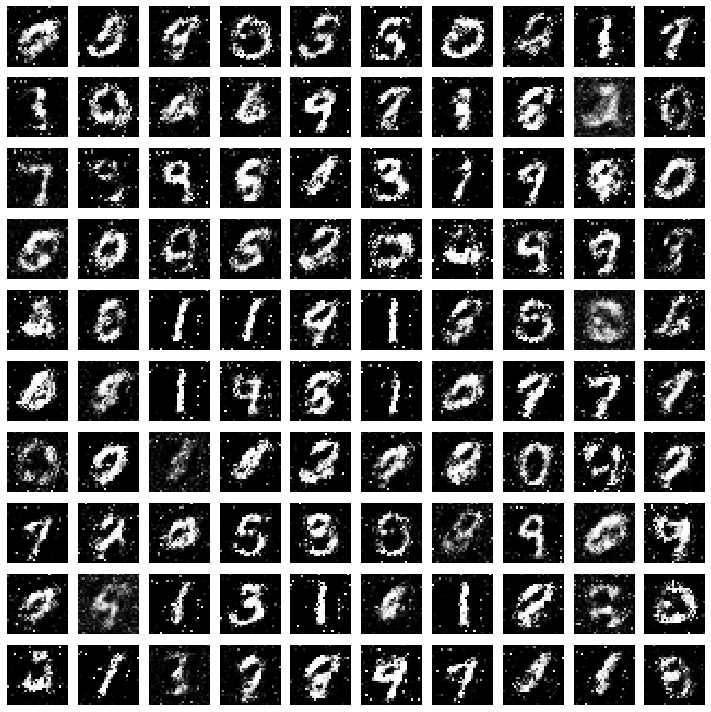

At Epoch 11 Discriminator loss is 0.6405699022560039 and Generator Loss is 1.0288389956849253
At Epoch 12 Discriminator loss is 0.6409725023385806 and Generator Loss is 1.0206372964585948
At Epoch 13 Discriminator loss is 0.6377316122381096 and Generator Loss is 1.0309432362898803
At Epoch 14 Discriminator loss is 0.641925333147375 and Generator Loss is 1.030593558254405
At Epoch 15 Discriminator loss is 0.6402711479837059 and Generator Loss is 1.0274986897268865


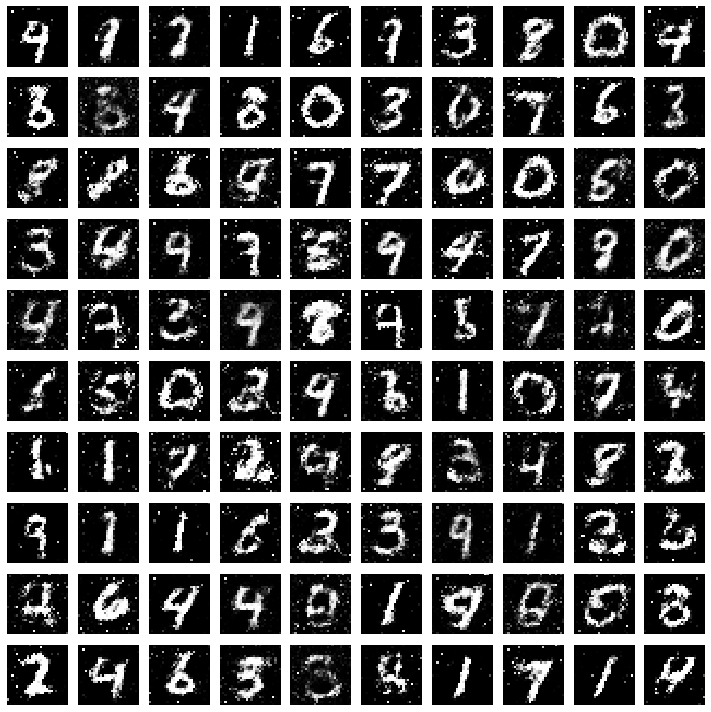

At Epoch 16 Discriminator loss is 0.6470289700306379 and Generator Loss is 1.0131452745861478
At Epoch 17 Discriminator loss is 0.6459207443090585 and Generator Loss is 1.0149958905501244
At Epoch 18 Discriminator loss is 0.6479772650278531 and Generator Loss is 1.0059857424507794
At Epoch 19 Discriminator loss is 0.6513777488571966 and Generator Loss is 1.0015886158515246
At Epoch 20 Discriminator loss is 0.6542536022826138 and Generator Loss is 0.9944704827080425


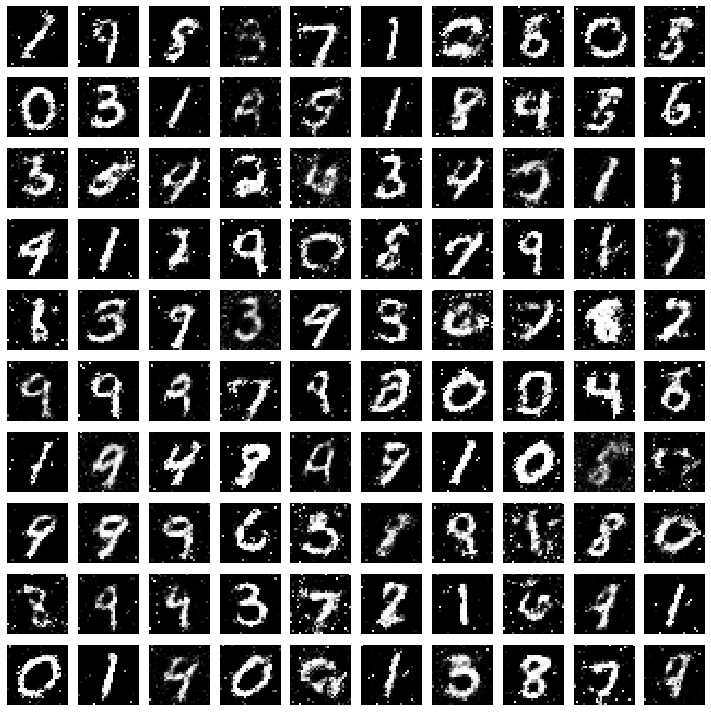

At Epoch 21 Discriminator loss is 0.6540830369688507 and Generator Loss is 0.9940475745078845
At Epoch 22 Discriminator loss is 0.6565459556559212 and Generator Loss is 1.0037800058340416
At Epoch 23 Discriminator loss is 0.6573739655506916 and Generator Loss is 0.9958989375676864
At Epoch 24 Discriminator loss is 0.6577433883889109 and Generator Loss is 0.9959783197468163
At Epoch 25 Discriminator loss is 0.6591764559857866 and Generator Loss is 0.9884587928780124


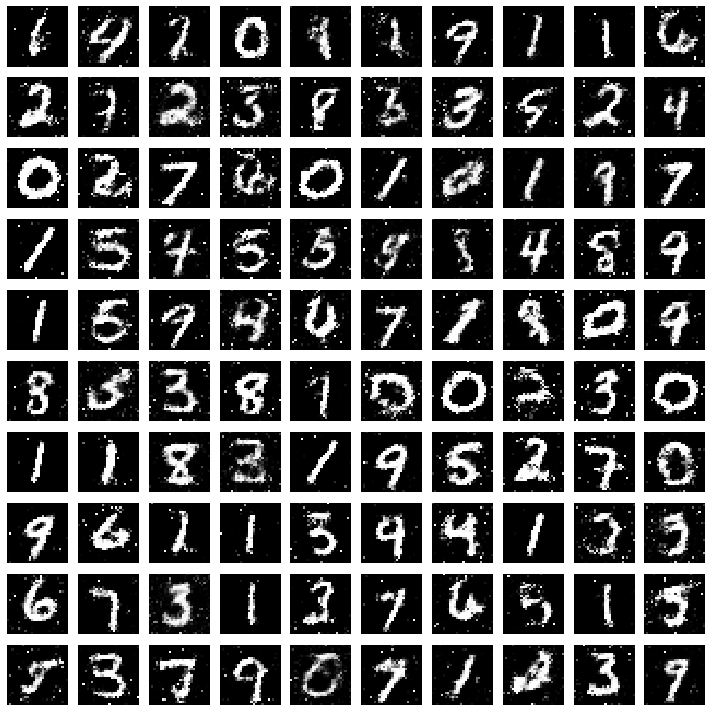

At Epoch 26 Discriminator loss is 0.6588766067965418 and Generator Loss is 0.9819756249586741
At Epoch 27 Discriminator loss is 0.6582501376541252 and Generator Loss is 0.9833597533213787
At Epoch 28 Discriminator loss is 0.6607854512766895 and Generator Loss is 0.9883480925335844
At Epoch 29 Discriminator loss is 0.6603511919577917 and Generator Loss is 0.9861132711426824
At Epoch 30 Discriminator loss is 0.6619442726811792 and Generator Loss is 0.9882594713797936


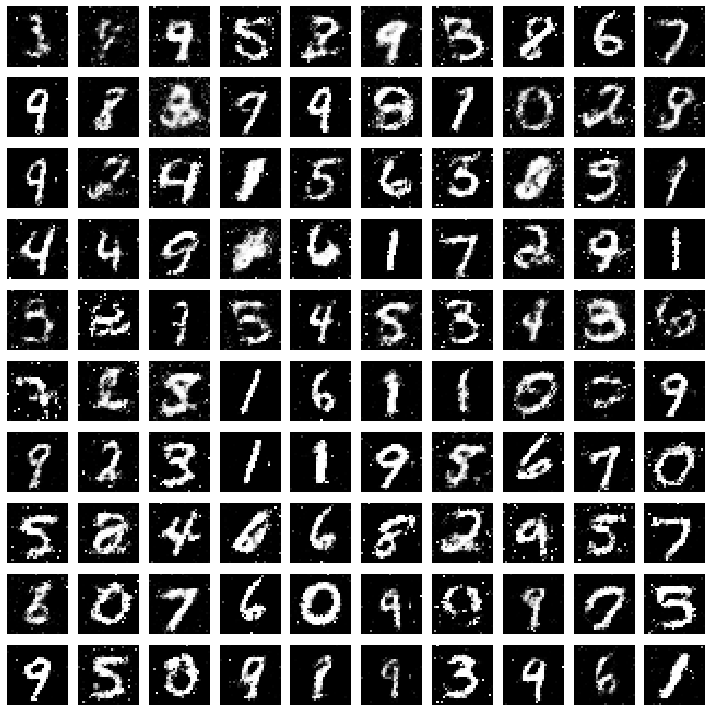

At Epoch 31 Discriminator loss is 0.6620420551198161 and Generator Loss is 0.9838401644657819
At Epoch 32 Discriminator loss is 0.6601805760819688 and Generator Loss is 0.982939149834152
At Epoch 33 Discriminator loss is 0.6610941516283231 and Generator Loss is 0.9754855576743428
At Epoch 34 Discriminator loss is 0.6623219730507615 and Generator Loss is 0.9852276001221094
At Epoch 35 Discriminator loss is 0.6642007047039831 and Generator Loss is 0.9787400662899017


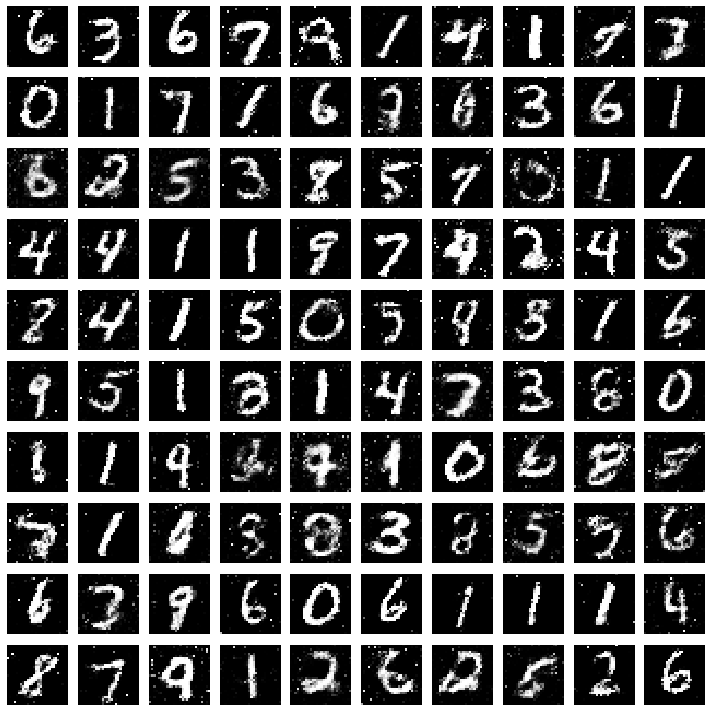

At Epoch 36 Discriminator loss is 0.6621920798833554 and Generator Loss is 0.9788390991524754
At Epoch 37 Discriminator loss is 0.6633921643862357 and Generator Loss is 0.9828729041111774
At Epoch 38 Discriminator loss is 0.6628072743232434 and Generator Loss is 0.9800046188199621
At Epoch 39 Discriminator loss is 0.6653583261192354 and Generator Loss is 0.9806395878649166
At Epoch 40 Discriminator loss is 0.6637797980991185 and Generator Loss is 0.9847177088770092


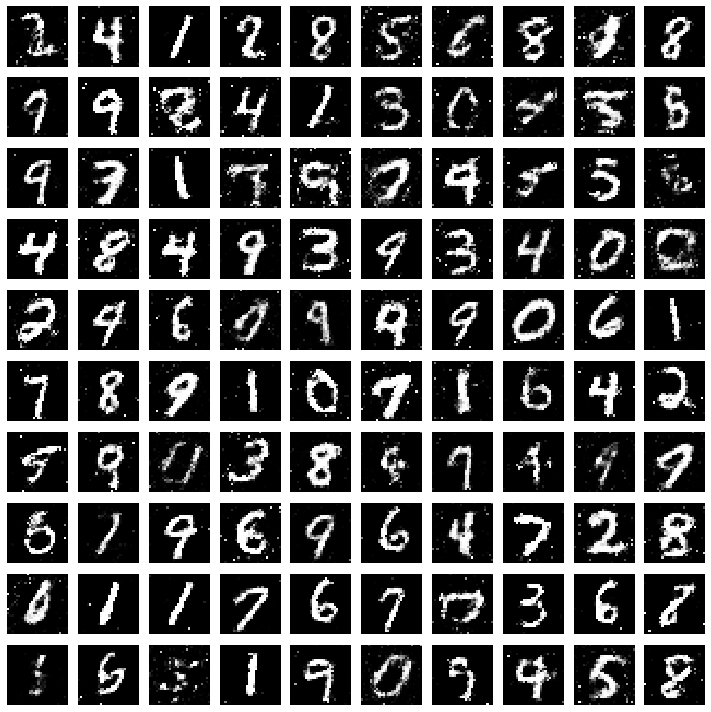

At Epoch 41 Discriminator loss is 0.6639616182471952 and Generator Loss is 0.977667771343492
At Epoch 42 Discriminator loss is 0.6654679467025985 and Generator Loss is 0.9765099462790366
At Epoch 43 Discriminator loss is 0.6654880886149203 and Generator Loss is 0.9727637451938075
At Epoch 44 Discriminator loss is 0.6662904859608055 and Generator Loss is 0.9742449193428724
At Epoch 45 Discriminator loss is 0.6659899291574446 and Generator Loss is 0.9731946213123126


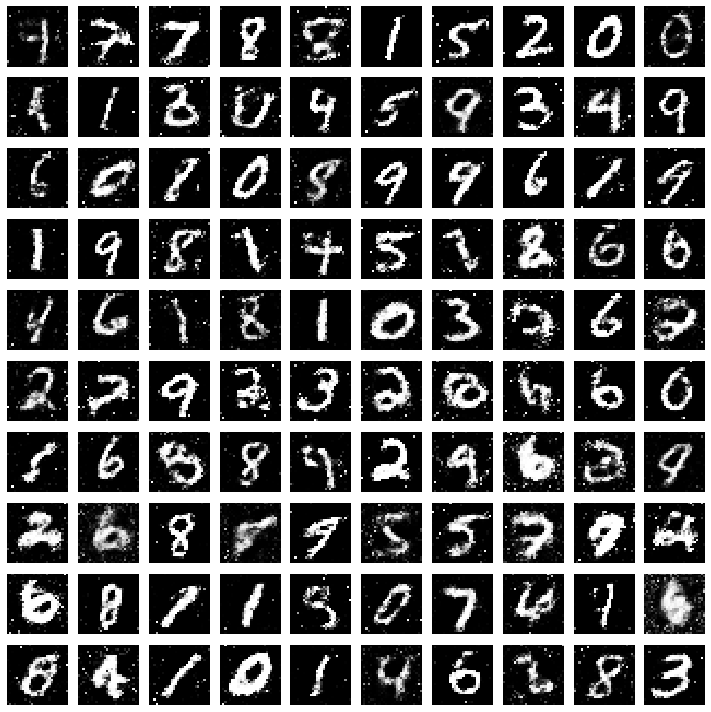

At Epoch 46 Discriminator loss is 0.6679932569336687 and Generator Loss is 0.9765753020078708
At Epoch 47 Discriminator loss is 0.6675912581193142 and Generator Loss is 0.9718501664634444
At Epoch 48 Discriminator loss is 0.6682134957140328 and Generator Loss is 0.9759992358521519
At Epoch 49 Discriminator loss is 0.6696368334894507 and Generator Loss is 0.9643469246534201
At Epoch 50 Discriminator loss is 0.6688157969560379 and Generator Loss is 0.9722898368142608


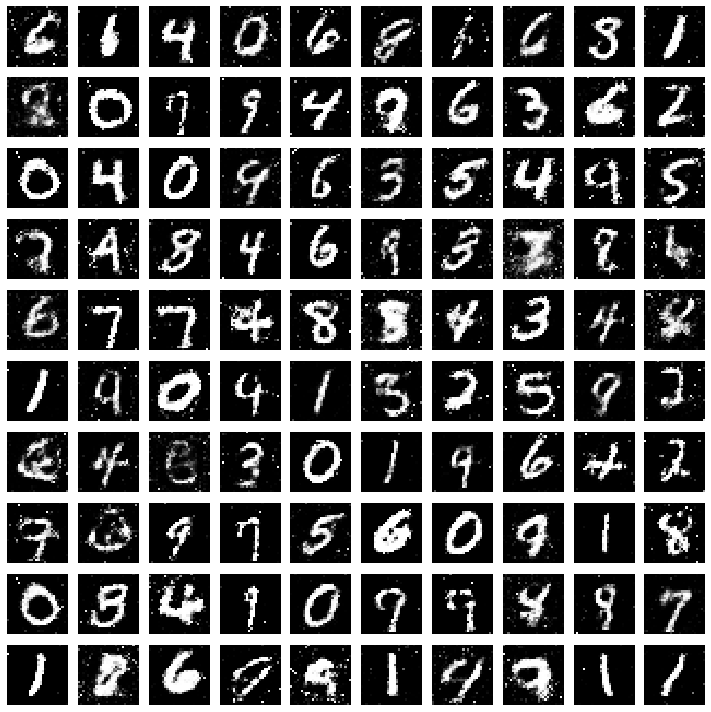

In [147]:
# Training Loop
d_losses = []
g_losses = []
for epoch in range(TOTAL_EPOCHS):
  epoch_d_loss = 0
  epoch_g_loss = 0

  #Mini Batch Stochastic Gradient Descent
  for step in range(NO_OF_BATCHES):
    # Step-1 Discriminator
    # 50 % of real data and 50% of fake data

    # Real Data X
    idx = np.random.randint(0,X_Train.shape[0],HALF_BATCH) # np.random.randint(range,count)
    real_imgs = X_Train[idx]

    # Fake Data x
    noise = np.random.normal(0,1,size=(HALF_BATCH,NOISE_DIM))
    fake_imgs = generator.predict(noise) #forward propagation

    # Labels
    real_y = np.ones((HALF_BATCH,1))*0.9  # One sided label smoothing for discriminator
    fake_y = np.zeros((HALF_BATCH,1))

    #Train our discriminator
    d_loss_real = discriminator.train_on_batch(real_imgs,real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs,fake_y)
    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    # Train generator (Considering Frozen Discriminator)
    noise = np.random.normal(0,1,size=(BATCH_SIZE,NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))
    g_loss = model.train_on_batch(noise,ground_truth_y)
    epoch_g_loss += g_loss

  # Print the Average Losses
  print(f"At Epoch {epoch + 1} Discriminator loss is {epoch_d_loss/NO_OF_BATCHES} and Generator Loss is {epoch_g_loss/NO_OF_BATCHES}")
  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)

  if ((epoch+1)%5)==0:
    generator.save(f"model/gan_generator_{epoch + 1}.h5")
    save_imgs(epoch)



In [148]:
# Zip folders to download it
!zip -r /content/images.zip /content/images

  adding: content/images/ (stored 0%)
  adding: content/images/gan_output_epoch_25.png (deflated 6%)
  adding: content/images/gan_output_epoch_45.png (deflated 5%)
  adding: content/images/gan_output_epoch_20.png (deflated 5%)
  adding: content/images/gan_output_epoch_15.png (deflated 4%)
  adding: content/images/gan_output_epoch_50.png (deflated 6%)
  adding: content/images/gan_output_epoch_35.png (deflated 6%)
  adding: content/images/gan_output_epoch_5.png (deflated 4%)
  adding: content/images/gan_output_epoch_10.png (deflated 4%)
  adding: content/images/gan_output_epoch_30.png (deflated 5%)
  adding: content/images/gan_output_epoch_40.png (deflated 6%)


In [150]:
# download
from google.colab import files
files.download('images.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

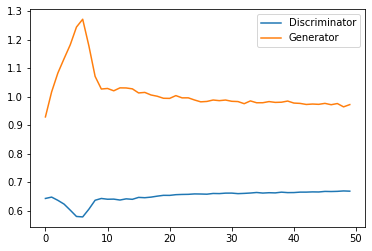

In [152]:
# plot the generator and discrimintator losses
plt.plot(d_losses,label='Discriminator')
plt.plot(g_losses,label='Generator')
plt.legend()
plt.show()